In [28]:
import numpy as np
import pandas as pd
from pathlib import Path
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras


#Image class labels into a dataframe
image_classes = np.loadtxt("../week_6/MARS/labels-map-proj-v3.txt", dtype = str, delimiter = " ") #image classification loaded from the txt file
df = pd.DataFrame(image_classes, columns=['filename', 'class']) #dataframe definition

#dataset splitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(df, test_size = 0.1) #test_size is to be set between 0 and 1
train_df, test_df = train_test_split(train_df, test_size = 0.2) #test_size is to be set between 0 and 1

idg = ImageDataGenerator(rescale = 1./255.) #rescale image values to be between 0 and 1 rather than up to 255



print("\tN(train)             = ", len(train_df))
print("\tN(test)              = ", len(test_df))
#print("\tTest data shape      = ", df.shape)



	N(train)             =  52581
	N(test)              =  13146


In [31]:
##################################################
#Model configuration
##################################################

ValidationSplit = 0.5 
BatchSize = 500
Nepochs = 10
DropoutValue = 0.1

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3))) 
model.add(keras.layers.MaxPooling2D((2, 2))) #possibly add strides = 2 here to speed it up
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(8, activation=tf.keras.activations.softmax))



#Data Generators

train = idg.flow_from_dataframe(dataframe = train_df,  x_col = 'filename', y_col = 'class', target_size = (128, 128), directory = "/home/jovyan/deep_learning/week_6/MARS/map-proj-v3", batch_size = BatchSize, class_mode = 'sparse') #establish the training dataset
test = idg.flow_from_dataframe(dataframe = test_df, x_col = 'filename', y_col = 'class', target_size = (128, 128), directory = "/home/jovyan/deep_learning/week_6/MARS/map-proj-v3", batch_size = BatchSize, class_mode = 'sparse') #establish the training dataset
validation = idg.flow_from_dataframe(dataframe = validation_df, x_col = 'filename', y_col = 'class', target_size = (128, 128), directory = "/home/jovyan/deep_learning/week_6/MARS/map-proj-v3", batch_size = BatchSize, class_mode = 'sparse') #establish the training dataset


print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs, "\n")
print("N(train)             = ", len(train_df)) #ds or df?
print("N(test)              = ", len(test_df)) #ds or df?
model.summary()
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history  = model.fit(train, validation_data=validation, epochs=Nepochs, shuffle = True) #x and y variables here? ds or df?


Found 52581 validated image filenames belonging to 8 classes.
Found 13146 validated image filenames belonging to 8 classes.
Found 7304 validated image filenames belonging to 8 classes.
--------------------------------------------------------------------------------------------------------------


Dropout values       =  0.1
Leaky relu parameter =  0.1
ValidationSplit      =  0.5
BatchSize            =  500
Nepochs              =  10 

N(train)             =  52581
N(test)              =  13146
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D

history keys =  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Display the evolution of the accuracy as a function of the training epoch
  N(Epochs)        =  10
  accuracy (train) =  [0.8205054998397827, 0.8410072326660156, 0.8575721383094788, 0.8733192682266235, 0.8858142495155334, 0.8890854120254517, 0.9019607901573181, 0.9129343032836914, 0.9230140447616577, 0.9337973594665527]
  accuracy (test)  =  [0.8314622044563293, 0.845564067363739, 0.8639101982116699, 0.875, 0.8674699068069458, 0.8845837712287903, 0.8851314187049866, 0.8903340697288513, 0.8880065679550171, 0.8911555409431458]


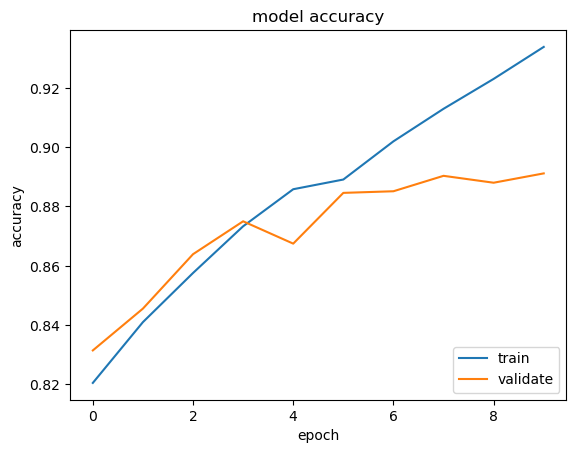


Display the evolution of the loss as a function of the training epoch
  N(Epochs)        =  10
  loss (train)     =  [0.8234512805938721, 0.580677330493927, 0.48989811539649963, 0.4250864088535309, 0.37288498878479004, 0.35727545619010925, 0.30900296568870544, 0.27146729826927185, 0.23568955063819885, 0.20397894084453583]
  loss (test)      =  [0.649845540523529, 0.5295898914337158, 0.45756712555885315, 0.4204651415348053, 0.43492695689201355, 0.38261863589286804, 0.3872518837451935, 0.35951295495033264, 0.35714176297187805, 0.385816365480423]


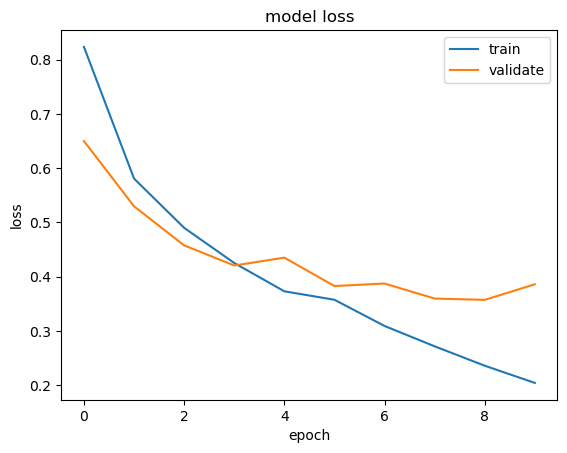


Performance summary (on test data):
27/27 - 10s - loss: 0.3627 - accuracy: 0.8969 - 10s/epoch - 379ms/step
	loss = 0.363
	accuracy = 0.897


In [32]:
#some plots

import matplotlib.pyplot as plt

# Print out the history keys expected are:
#    loss        The loss function evaluated at each epoch for the training set
#    acc         The accuracy evaluated at each epoch for the training set
#    val_loss    The loss evaluated at each epoch for the validation set
#    val_acc     The accuracy evaluated at each epoch for the validation set
# The val_* entries exist only if there is a validation_split specified

print("history keys = ", history.history.keys())

print("\n\033[1mDisplay the evolution of the accuracy as a function of the training epoch\033[0m")
print("  N(Epochs)        = ", Nepochs)

print("  accuracy (train) = ", history.history['accuracy'])
print("  accuracy (test)  = ", history.history['val_accuracy'])
plt.plot(history.history['accuracy']) # 'accuracy'
plt.plot(history.history['val_accuracy']) # 'val_accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()
plt.clf()

print("\n\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m")
print("  N(Epochs)        = ", Nepochs)
print("  loss (train)     = ", history.history['loss'])
print("  loss (test)      = ", history.history['val_loss'])

# summarize history for loss
plt.plot(history.history['loss']) # 'loss'
plt.plot(history.history['val_loss']) # 'val_loss'
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

# having finished training the model, use this to evaluate the performance on a sample of test data
print("\n\033[1mPerformance summary (on test data):\033[0m")
loss, acc = model.evaluate(test, verbose=2) # remember to use test set!
print("\tloss = {:5.3f}\n\taccuracy = {:5.3f}".format(loss, acc))

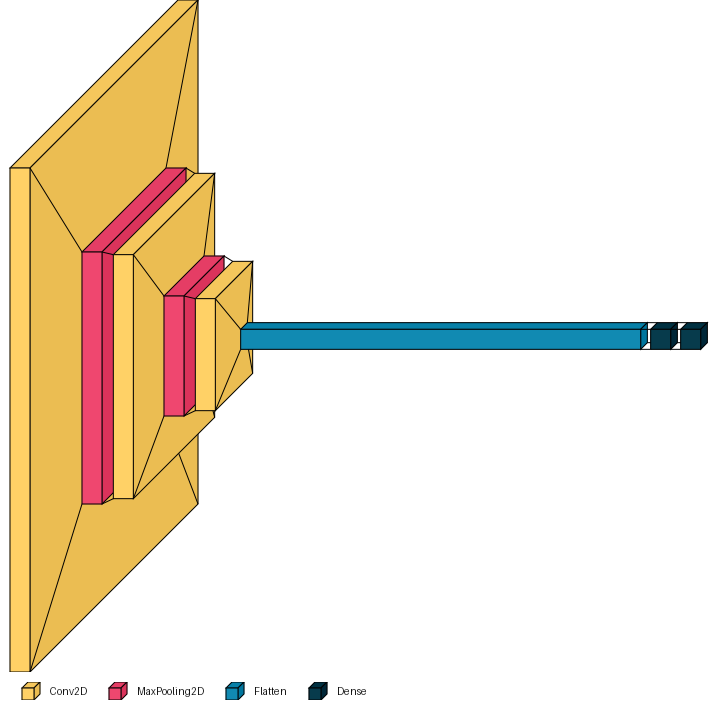

In [33]:
#Network design diagram

import visualkeras
visualkeras.layered_view(model, legend = True)

1/1 [==============================] - 0s 23ms/step


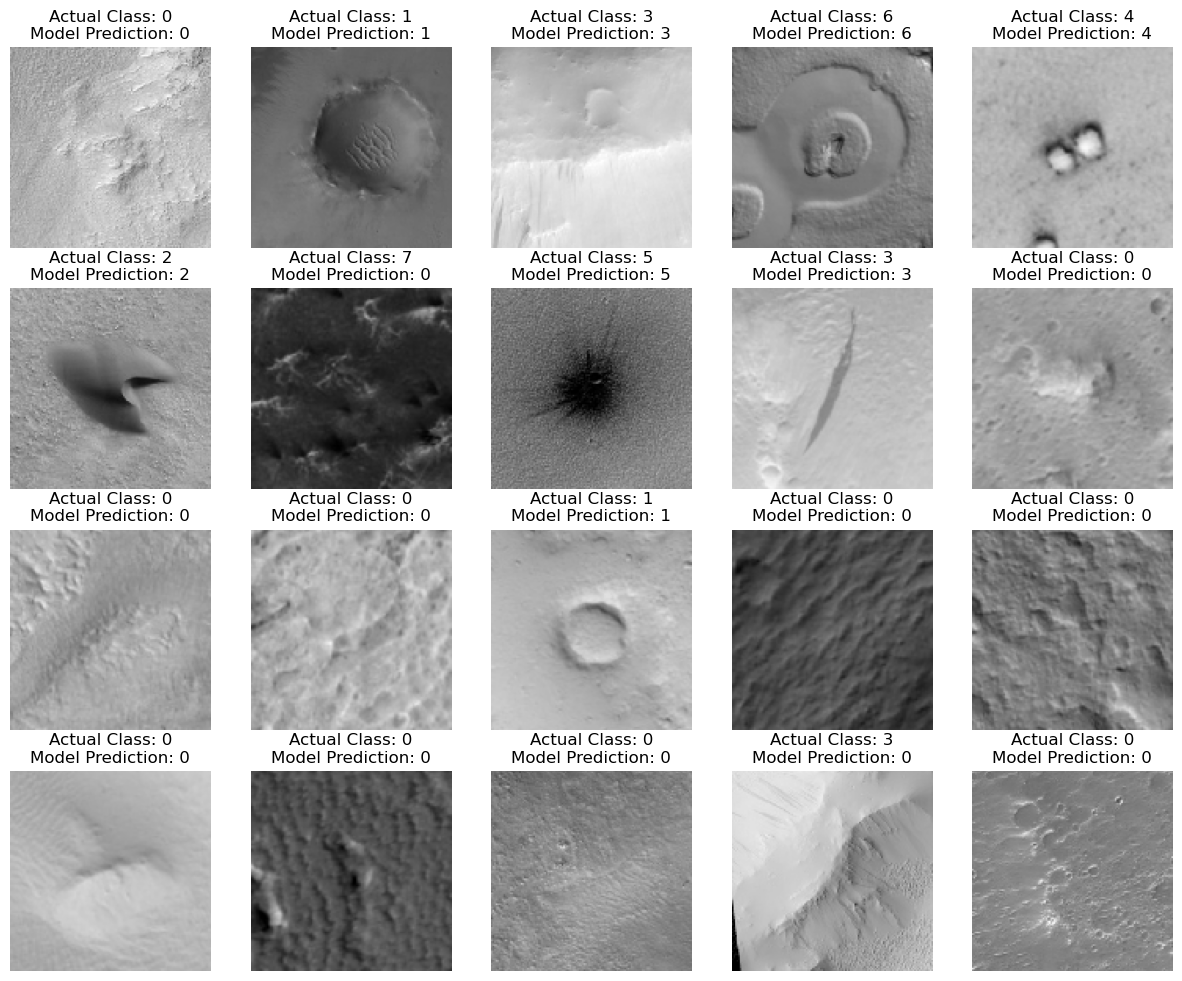

In [49]:
#Generating 20 of the input images in the test set including their true labels (ensure at least 1 of each of the 8 classes appear)
#start by just getting the images and some labels first then worry about ensuring 1 of each class appears.
#figure out how to ensure the test data set has at least one of each class as a part of it.****

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from pathlib import Path

SelectedImages = []
for ClassLabel in test_df['class'].unique():
    Sample = test_df[test_df['class'] == ClassLabel].sample(n = 1)
    SelectedImages.append(Sample)

SamplesRemaining = test_df.sample(n = 20 - len(SelectedImages), replace = False)
SelectedImages.append(SamplesRemaining) #iterate over dataframe rows
SelectedImages = pd.concat(SelectedImages).reset_index(drop = True)

Images = []
TrueLabels = []
FileNames = []

for _, row in SelectedImages.iterrows():
    ImagePath = Path("/home/jovyan/deep_learning/week_6/MARS/map-proj-v3") / row['filename']
    Image = load_img(ImagePath, target_size = (128, 128))
    ImageArray = img_to_array(Image)/255.0
    Images.append(ImageArray)
    TrueLabels.append(row['class'])
    FileNames.append(row['filename'])

Images = np.array(Images)
ModelPredictions = model.predict(Images)
PredictedClasses = np.argmax(ModelPredictions, axis = 1)
fig, axes = plt.subplots(4, 5, figsize = (15,12))
axes = axes.flatten()

for i in range(20):
    Axes = axes[i]
    Axes.imshow(Images[i])
    Axes.axis('off')
    Axes.set_title(f'Actual Class: {TrueLabels[i]}\nModel Prediction: {PredictedClasses[i]}')

plt.show()

In [ ]:
#plot for each individual classification category at the end of training